# Device 8 data

data/gorodec/sq_gmol1.avi.txt
7.528323060985698

data/gorodec/sq_gmol2.avi.txt
7.2083142241208416

data/gorodec/sq_gmol3.avi.txt
6.829139821373652

data/stan_mol/sq_stmol.avi.txt
6.827916024795676

data/stan_mol/sq_stmol2.avi.txt
6.78694294917361

data/stan_mol/sq_st_mol1.avi.txt
6.73540514337364

[6.827916024795676, 6.78694294917361, 6.73540514337364]
data/knyaginino/sq_kmol1.avi.txt
6.138368806459301

data/knyaginino/sq_kmol2.avi.txt
2.459640035908776

data/knyaginino/sq_kmol3.avi.txt
3.080802764062796



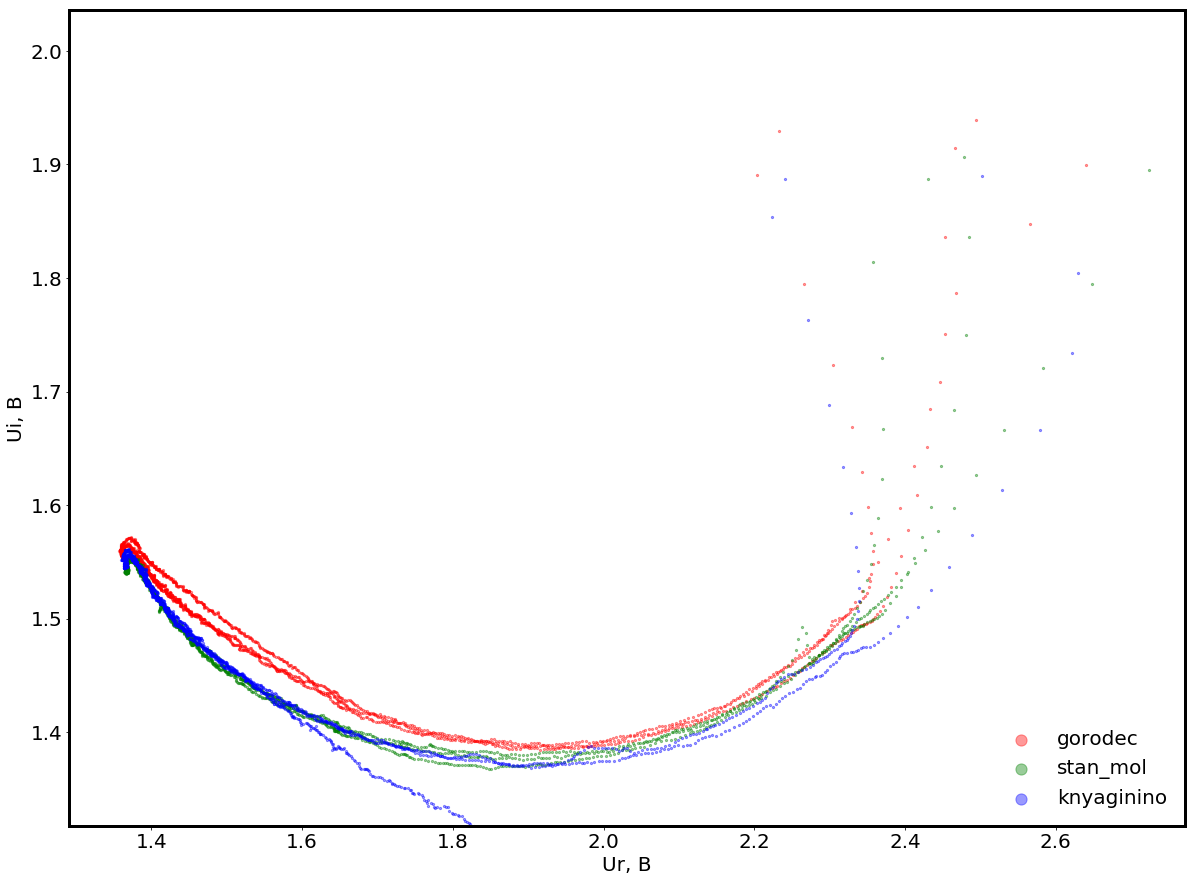

In [43]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os


def ListFiles(s):
    lp=[]
    ln=[]
    for file in os.listdir(s):    
        if file.endswith(".csv"):
            lp.append(s + file)
            ss=file.replace('.csv','')
            ln.append(ss)
    return lp, ln


def CsvToLists(fn):
    t = []
    Ur = []
    Ui = []
    with open(fn, 'r') as f:
        header = f.readline()
        for line in f:
            s = line.replace(',','.')
            l = s.split(';')
            for j in range(5 - len(l)):
                l.append(0)
            a,b,c,d,e,f = l #s.split(';')
            t.append(int(a))
            Ur.append(float(b))
            Ui.append(float(c))
    return t, Ur, Ui


def ConcAllEllist(l, c):
    l1 = []
    if type(l)!=list:
        return  list(c + str(l))
    for i in range(len(l)):
        l1.append (c + str(l[i]))
    return l1


def notNullt(s):
    z = frame.loc[frame[s].notnull(), s]
    return z 


def LoadDir(s):
    lp, ln = ListFiles(s)
    tt = []
    Urr = []
    Uii = [] 
    sq = []
    for i in range(len(lp)):
        ss = ln[i]
        ss = s + 'sq_' + ss[:ss.rfind('-')] + '.avi.txt'
        print(ss)
        with open(ss, 'r') as f:
            sss = f.readline() 
        print(sss)    
        sss = sss. replace('\n', '')
        sq.append(float(sss))  
        #print(sss)
        
        t, Ur, Ui = CsvToLists(lp[i])
        tt.append(t)
        Urr.append(Ur)
        Uii.append(Ui)
        #print(sq)
    return tt, Urr, Uii, sq


def Annotate(ax, c, p, a, xbord):
    bbox_props = dict(boxstyle="circle,pad=0.3", fc="white", ec="white", lw=2, alpha=0.1) 
    for i in range(1, len(c)):
        if p[i] < xbord:
             ax.annotate(c[i], xy=(p[i]+0.2, a[i]), ha='center', va='center', bbox=bbox_props)

                
def SrDisp(Urr, Uii):         
    k = len(Urr)
    n = len(Urr[0])
    
    for i in range(n):
        Urs = 0 
        Uis = 0
        for j in range(k):
            Urs = Urs + Urr[j][i]
            Uis = Uis + Uii[j][i]
        Urs = Urs/k
        Uis = Uis/k
    return Urs, Uis

def normirivka(Ur, Ui, sq):
    for i in range(len(Ur)):
        Ur[i] = Ur[i]/sq
        Ui[i] = Ui[i]/sq
    return Ur, Ui
    
#fn = 'k06-6k.csv'
#T, Ur, Ui = CsvToLists(fn) 

tt, Urr, Uii, sq = LoadDir('data/gorodec/')        


#print('Шум:' + str(len(neventCell)))
#print('Событий, связанных с движением:' + str(len(meventCell)))
#print('Событий, связанных с изменением фокуса:' + str(len(feventCell)))
#print('Событий:' + str(len(eventCell)))
xh = max(max(Urr))*1.05
#print(xh)
xl = min(min(Urr))*0.95
yh = max(max(Uii))*1.05
yl = min(min(Uii))*0.95

fig2, ax = plt.subplots(figsize = (20,15))
plt.xlim([xl, xh])
plt.ylim([yl, yh])

for i in range(len(Urr)):
    Ur = Urr[i] 
    Ui = Uii[i]
     
    if i==0:
        ax.scatter(Ur, Ui, alpha=0.4, c = 'r', s = 5, label = 'gorodec')
    else:    
        ax.scatter(Ur, Ui, alpha=0.4, c = 'r', s = 5)
plt.xlabel('Ur, В', fontsize = 20)
plt.ylabel('Ui, В', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
ax.spines['bottom'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)

#plt.grid()
#plt.title('Образцы с разной жирностью (прибор 8)', fontsize = 24)


tt, Urr, Uii, sq = LoadDir('data/stan_mol/')  
print(sq)
for i in range(len(Urr)):
    Ur = Urr[i] 
    Ui = Uii[i]

    if i==0:
        ax.scatter(Ur, Ui, alpha=0.4, c = 'g', s = 5, label = 'stan_mol')
    else: 
        ax.scatter(Ur, Ui, alpha=0.4, c = 'g', s = 5)
        
tt, Urr, Uii, sq = LoadDir('data/knyaginino/')        
for i in range(len(Urr)):
    Ur = Urr[i] 
    Ui = Uii[i]

    if i==0:
        ax.scatter(Ur, Ui, alpha=0.4, c = 'b', s = 5, label = 'knyaginino')
    else: 
        ax.scatter(Ur, Ui, alpha=0.4, c = 'b', s = 5)
        


ax.legend(loc="lower right", markerscale=5, fontsize = 20, frameon=False)



data/gorodec/sq_gmol1.avi.txt
7.528323060985698

data/gorodec/sq_gmol2.avi.txt
7.2083142241208416

data/gorodec/sq_gmol3.avi.txt
6.829139821373652

data/stan_mol/sq_stmol.avi.txt
6.827916024795676

data/stan_mol/sq_stmol2.avi.txt
6.78694294917361

data/stan_mol/sq_st_mol1.avi.txt
6.73540514337364

[6.827916024795676, 6.78694294917361, 6.73540514337364]
data/knyaginino/sq_kmol1.avi.txt
6.138368806459301

data/knyaginino/sq_kmol2.avi.txt
2.459640035908776

data/knyaginino/sq_kmol3.avi.txt
3.080802764062796



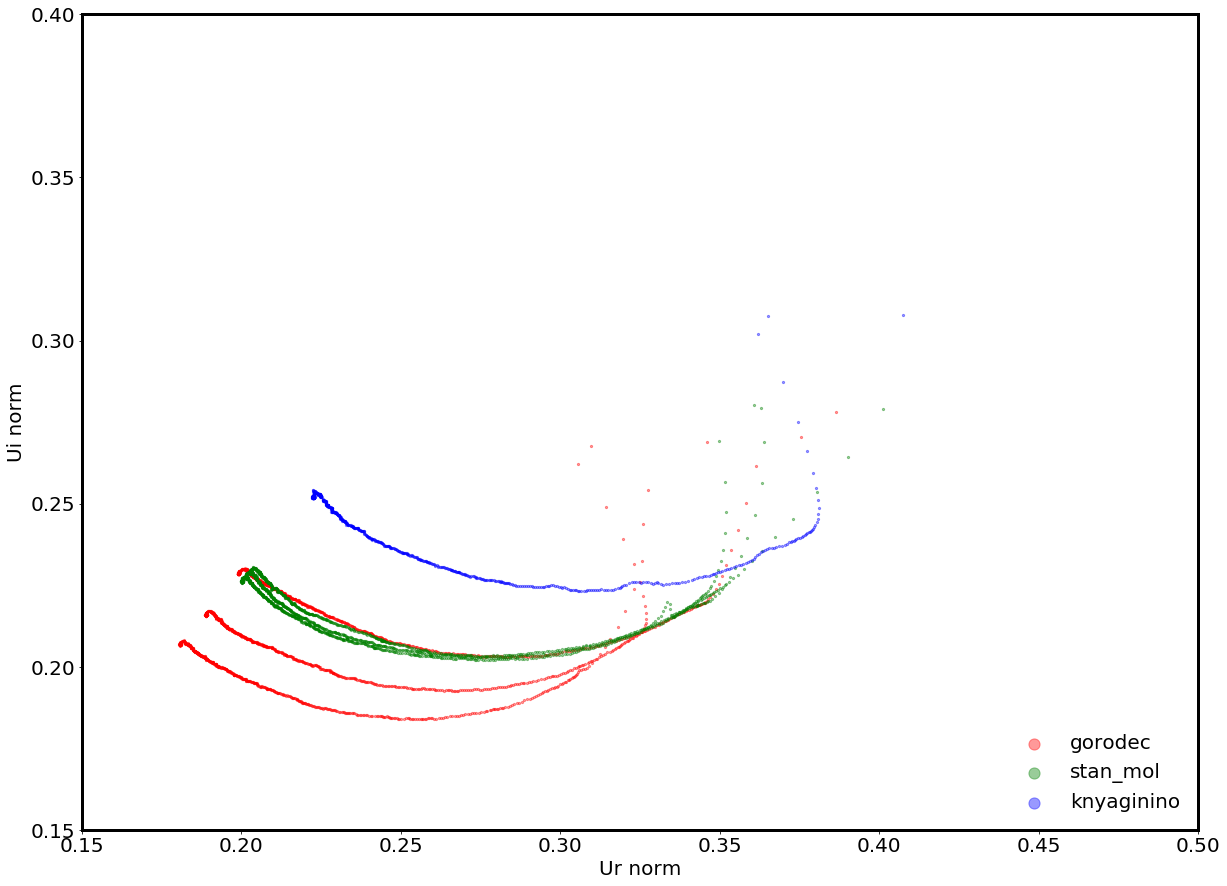

In [44]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os


def ListFiles(s):
    lp=[]
    ln=[]
    for file in os.listdir(s):    
        if file.endswith(".csv"):
            lp.append(s + file)
            ss=file.replace('.csv','')
            ln.append(ss)
    return lp, ln


def CsvToLists(fn):
    t = []
    Ur = []
    Ui = []
    with open(fn, 'r') as f:
        header = f.readline()
        for line in f:
            s = line.replace(',','.')
            l = s.split(';')
            for j in range(5 - len(l)):
                l.append(0)
            a,b,c,d,e,f = l #s.split(';')
            t.append(int(a))
            Ur.append(float(b))
            Ui.append(float(c))
    return t, Ur, Ui


def ConcAllEllist(l, c):
    l1 = []
    if type(l)!=list:
        return  list(c + str(l))
    for i in range(len(l)):
        l1.append (c + str(l[i]))
    return l1


def notNullt(s):
    z = frame.loc[frame[s].notnull(), s]
    return z 


def LoadDir(s):
    lp, ln = ListFiles(s)
    tt = []
    Urr = []
    Uii = [] 
    sq = []
    for i in range(len(lp)):
        ss = ln[i]
        ss = s + 'sq_' + ss[:ss.rfind('-')] + '.avi.txt'
        print(ss)
        with open(ss, 'r') as f:
            sss = f.readline() 
        print(sss)    
        sss = sss. replace('\n', '')
        sq.append(float(sss))  
        #print(sss)
        
        t, Ur, Ui = CsvToLists(lp[i])
        tt.append(t)
        Urr.append(Ur)
        Uii.append(Ui)
        #print(sq)
    return tt, Urr, Uii, sq


def Annotate(ax, c, p, a, xbord):
    bbox_props = dict(boxstyle="circle,pad=0.3", fc="white", ec="white", lw=2, alpha=0.1) 
    for i in range(1, len(c)):
        if p[i] < xbord:
             ax.annotate(c[i], xy=(p[i]+0.2, a[i]), ha='center', va='center', bbox=bbox_props)

                
def SrDisp(Urr, Uii):         
    k = len(Urr)
    n = len(Urr[0])
    
    for i in range(n):
        Urs = 0 
        Uis = 0
        for j in range(k):
            Urs = Urs + Urr[j][i]
            Uis = Uis + Uii[j][i]
        Urs = Urs/k
        Uis = Uis/k
    return Urs, Uis

def normirivka(Ur, Ui, sq):
    for i in range(len(Ur)):
        Ur[i] = Ur[i]/sq
        Ui[i] = Ui[i]/sq
    return Ur, Ui
    
#fn = 'k06-6k.csv'
#T, Ur, Ui = CsvToLists(fn) 

tt, Urr, Uii, sq = LoadDir('data/gorodec/')        


#print('Шум:' + str(len(neventCell)))
#print('Событий, связанных с движением:' + str(len(meventCell)))
#print('Событий, связанных с изменением фокуса:' + str(len(feventCell)))
#print('Событий:' + str(len(eventCell)))

fig2, ax = plt.subplots(figsize = (20,15))
xh = max(Ur)*1.05
xl = min(Ur)*0.95
yh = max(Ui)*1.05
yl = min(Ui)*0.95

plt.xlim([0.15, 0.5])
plt.ylim([0.15, 0.4])

for i in range(len(Urr)):
    Ur = Urr[i] 
    Ui = Uii[i]
    Ur, Ui = normirivka(Ur, Ui, sq[i])
     
    if i==0:
        ax.scatter(Ur, Ui, alpha=0.4, c = 'r', s = 5, label = 'gorodec')
    else:    
        ax.scatter(Ur, Ui, alpha=0.4, c = 'r', s = 5)
plt.xlabel('Ur norm', fontsize = 20)
plt.ylabel('Ui norm', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
ax.spines['bottom'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)

#plt.grid()
#plt.title('Образцы с разной жирностью (прибор 8)', fontsize = 24)


tt, Urr, Uii, sq = LoadDir('data/stan_mol/')  
print(sq)
for i in range(len(Urr)):
    Ur = Urr[i] 
    Ui = Uii[i]
    Ur, Ui = normirivka(Ur, Ui, sq[i])
    if i==0:
        ax.scatter(Ur, Ui, alpha=0.4, c = 'g', s = 5, label = 'stan_mol')
    else: 
        ax.scatter(Ur, Ui, alpha=0.4, c = 'g', s = 5)
        
tt, Urr, Uii, sq = LoadDir('data/knyaginino/')        
for i in range(len(Urr)):
    Ur = Urr[i] 
    Ui = Uii[i]
    Ur, Ui = normirivka(Ur, Ui, sq[i])
    if i==0:
        ax.scatter(Ur, Ui, alpha=0.4, c = 'b', s = 5, label = 'knyaginino')
    else: 
        ax.scatter(Ur, Ui, alpha=0.4, c = 'b', s = 5)
        


ax.legend(loc="lower right", markerscale=5, fontsize = 20, frameon=False)



# Classif K neib & SVC

In [37]:
#X_train, X_test, y_train, y_test
print(y_train)
print(y_test)

[2, 2, 2, 1, 3, 3, 3]
[1, 1, 3]
